In [167]:
%matplotlib inline

In [168]:
import cv2
import numpy as np
import argparse
import glob
import os
import matplotlib.pyplot as plt

In [169]:
plt.rcParams['figure.figsize'] = [8,8]

Image path:05.jpg


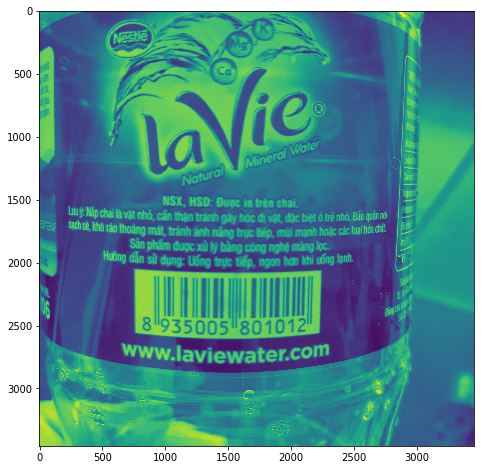

In [170]:
path = input("Image path:")
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

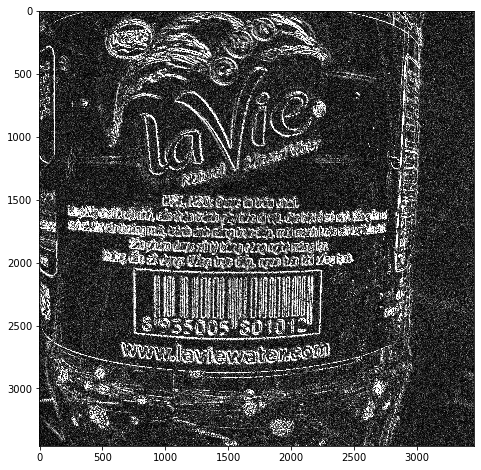

In [171]:
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient, cmap='gray')

Blur 1: 5
Blur 2: 5
Threshold: 200


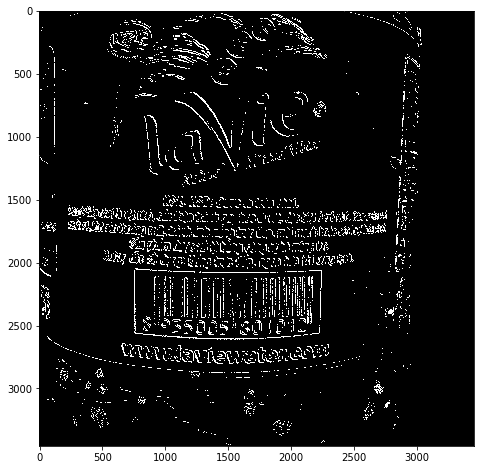

In [172]:
#img = [blur1,blur2,threshold]
#01.jpg = [4,4,210]
#02.jpg = [3,3,150]
#03.jpg = [15,9,220]
#04.jpg = [5,5,200]
#05.jpg = [5,5,200]


blur1 = int(input("Blur 1: "))
blur2 = int(input("Blur 2: "))
threshold = float(input("Threshold: "))
blurimg = cv2.blur(gradient, (blur1, blur2))
(_, thresholdimg) = cv2.threshold(blurimg, threshold, 255, cv2.THRESH_BINARY)
plt.imshow(thresholdimg, cmap='gray')

Kernel 1: 60
Kernel 2: 15
Erode: 30
Dilate: 3


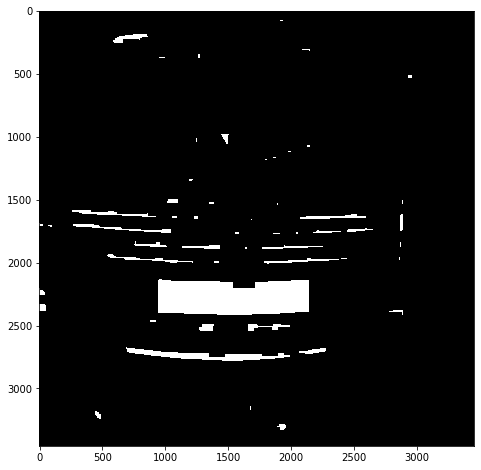

In [173]:
#img = [kernel1,kernel2,erode,dilate]
#01.jpg = [30,5,30,30]
#02.jpg = [60,5,40,40]
#03.jpg = [5,40,10,10]
#04.jpg = [35,5,15,2]
#05.jpg = [60,15,30,3]


kernel1 = int(input("Kernel 1: "))
kernel2 = int(input("Kernel 2: "))
erode = int(input("Erode: "))
dilate = int(input("Dilate: "))

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel1, kernel2))
closed = cv2.morphologyEx(thresholdimg, cv2.MORPH_CLOSE, kernel)
closed = cv2.erode(closed, None, iterations = erode)
closed = cv2.dilate(closed, None, iterations = dilate)
plt.imshow(closed, cmap='gray')

In [174]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]

In [175]:
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))

True

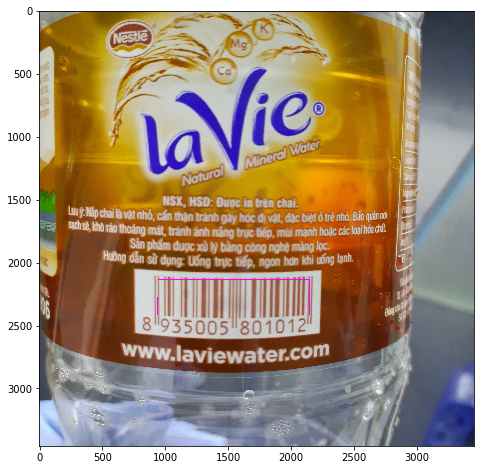

In [176]:
cv2.drawContours(image, [box], -1, (255, 0, 255), 3)
plt.imshow(image, cmap='gray')
name = path[-6:-4]+"output.jpg"
cv2.imwrite(name, image)